# Якубов Артём ИУ5-24М Вариант 16, задачи 16/36

In [1]:
!pip freeze

absl-py==1.4.0
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.15.1
astropy==5.2.1
astunparse==1.6.3
attrs==22.2.0
audioread==3.0.0
autograd==1.5
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blis==0.7.9
bokeh==2.4.3
branca==0.6.0
CacheControl==0.12.11
cached-property==1.5.2
cachetools==5.3.0
catalogue==2.0.8
certifi==2022.12.7
cffi==1.15.1
chardet==4.0.0
charset-normalizer==2.0.12
chex==0.1.7
click==8.1.3
cloudpickle==2.2.1
cmake==3.25.2
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.4
cons==0.4.5
contextlib2==0.6.0.post1
contourpy==1.0.7
convertdate==2.4.0
cryptography==40.0.1
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.3.1
cycler==0.11.0
cymem==2.0.7
Cython==0.29.33
dask==2022.12.1
datascience==0.17.6
db-dtypes==1.0.5
dbus-python==1.2.16
debugpy==1.6.6
decorator==4.4.2
defusedxml==0.7.1
distributed==2022.12.1
dlib==19.24.1
dm-tree==0.1.8
docutils==0

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy

Загрузка датасета

In [3]:
data = pd.read_csv('/content/sample_data/california_housing_train.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


**Задача 16**

In [4]:
boxcox_data = scipy.stats.boxcox(data['total_rooms'])
print(boxcox_data)

(array([24.47623037, 26.44507967, 14.22151154, ..., 20.26050259,
       20.25066479, 18.30987437]), 0.2104230396337911)


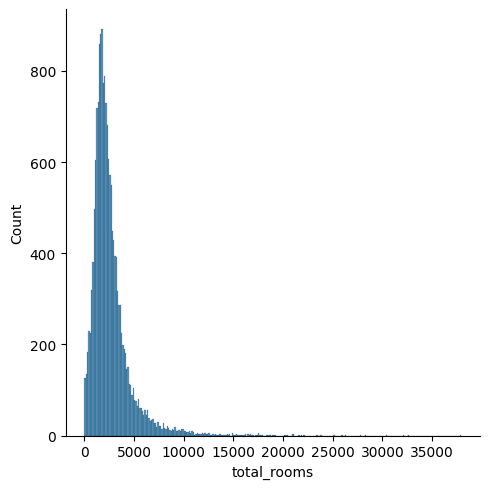

In [5]:
sns.displot(data['total_rooms'])

Преобразованные данных в нормальное распределение

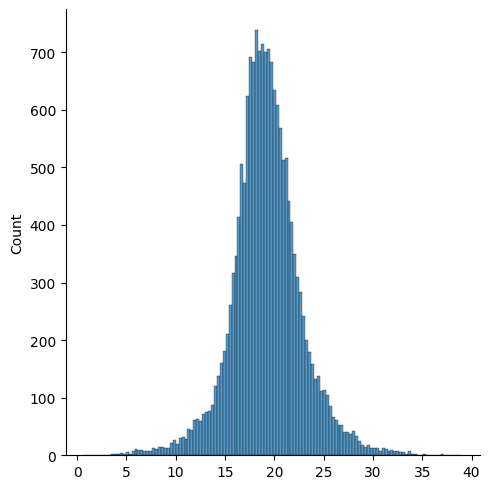

In [6]:
sns.displot(boxcox_data[0])

In [9]:
weather = pd.read_csv('/content/weatherHistory.csv')
weather.shape


(18461, 12)

In [10]:
weather.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

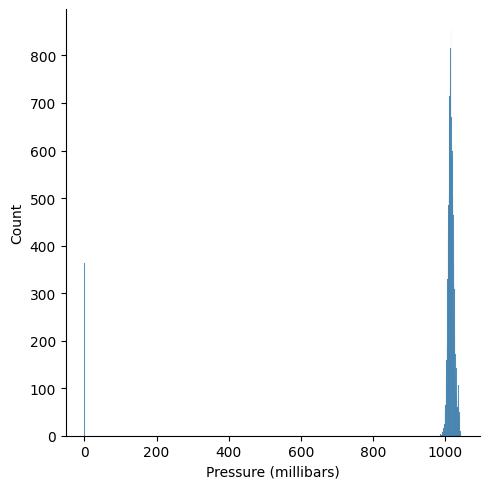

In [11]:
sns.displot(weather['Pressure (millibars)'])

In [12]:
temp = weather['Humidity']
temp[temp <= 0] = 1
print(temp)

0        0.89
1        0.86
2        0.89
3        0.83
4        0.83
         ... 
18456    0.68
18457    0.70
18458    0.80
18459    0.73
18460     NaN
Name: Humidity, Length: 18461, dtype: float64


<ipython-input-12-7c8825752753>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[temp <= 0] = 1


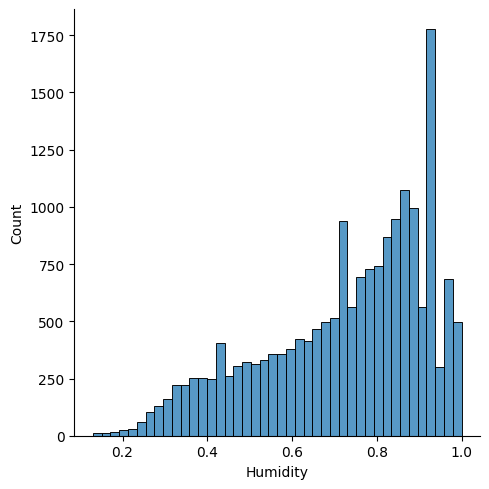

In [13]:
sns.displot(weather['Humidity'])

In [14]:
box_temp = scipy.stats.boxcox(temp)
print(box_temp)

(array([-0.07405631, -0.0851436 , -0.07405631, ..., -0.10021134,
       -0.10982935,         nan]), 8.472135811722177)


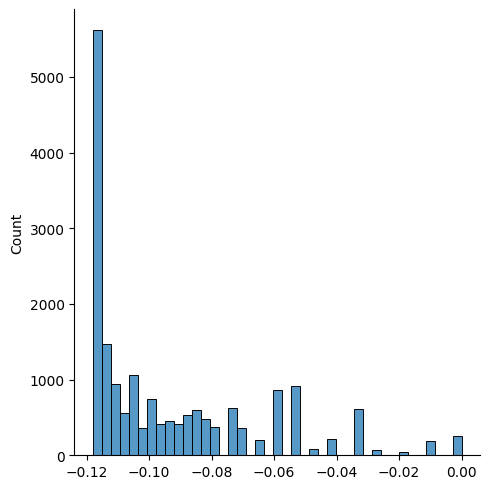

In [15]:
sns.displot(box_temp[0])

**Задача 36**

In [16]:
from sklearn import datasets

# Load the dataset
diabetes = datasets.load_diabetes()

In [17]:
diabetes = datasets.load_diabetes(as_frame=True)

print(diabetes['target'])

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64


In [22]:
from sklearn.feature_selection import mutual_info_regression, SelectKBest

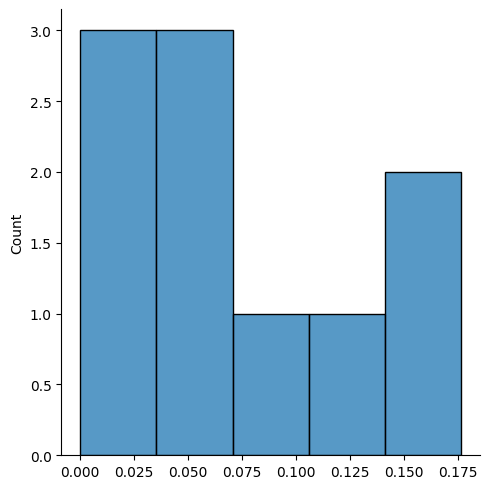

In [20]:
test3 = mutual_info_regression(diabetes['data'],diabetes['target'])
test3 = pd.Series(test3)
sns.displot(test3)

In [23]:
sel_mi = SelectKBest(mutual_info_regression, k=5).fit(diabetes['data'],diabetes['target'])
list(zip(diabetes['feature_names'], sel_mi.get_support()))

[('age', False),
 ('sex', False),
 ('bmi', True),
 ('bp', False),
 ('s1', False),
 ('s2', False),
 ('s3', True),
 ('s4', True),
 ('s5', True),
 ('s6', True)]

Задание группы ИУ5-24М

In [29]:
print(diabetes['data']['age'])

0      0.038076
1     -0.001882
2      0.085299
3     -0.089063
4      0.005383
         ...   
437    0.041708
438   -0.005515
439    0.041708
440   -0.045472
441   -0.045472
Name: age, Length: 442, dtype: float64


<Axes: >

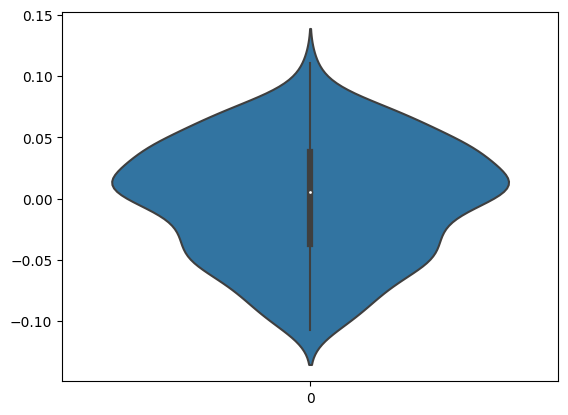

In [32]:
sns.violinplot(data=diabetes['data']['age'])